# Group  Proposal

## Exploring Optimal Models for Recognizing Handwritten English Characters: A Data Science Approach

### Introduction: 


In the current digital era, characterized by the prominent role of written communication, the accurate recognition and interpretation of handwritten characters have assumed significant importance. The applications of handwriting recognition encompass a wide range of areas, including automatic form processing and the digitization of historical manuscripts. This research aims to develop optimal Models for the recognition and interpretation of handwritten English characters depicted in the provided image. To achieve this, we employ classification techniques implemented in the R programming language and utilize visualization through various plots to present our research findings. The proportion of our training sets and testing sets is 0.75.
 
Three key plots constitute our final outcomes. Firstly, a line plot will be generated, with the k value on the x-axis and cross-validation accuracy on the y-axis.
Secondly, another line plot will be constructed, representing the accuracy achieved after removing different cut-off testing sets. The x-axis will denote the various cut-off testing sets used, while the y-axis will depict the accuracy obtained following the elimination of these sets.

Lastly, a histogram will be generated, presenting the distribution of possibilities on the x-axis and the corresponding number of cases on the y-axis. This histogram provides insights into the probability distribution of the recognized characters, offering a visual representation of their frequency within the dataset.

Based on the aforementioned considerations, the primary objective of our research is to identify the most effective approach for recognizing and interpreting handwritten English characters.

### Preliminary exploratory data analysis:

In [1]:
# import the package
library(tidyverse)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)

show_digit = function(arr784, col = gray(12:1 / 12), ...) {
  arr784$X <- 0
  image(matrix(as.matrix(arr784[-785]), nrow = 28)[, 28:1], col = col, ...)
}

── Attaching core tidyverse packages ────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ──────────────────────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     

── Conflicts ─────────────────────────────────────────────────────────── tidymodels

In [2]:
# demonstrate that the dataset can be read from the web into R 
downloaded_csv <- read_csv("/Users/chengxiansheng/Downloads/A_Z Handwritten Data.csv", 
                           col_names = c("label",seq(from=1,to=784,by=1)),
                           skip=1) # the source dataset is larger than 100MB which cannot be uploaded to Github

head(downloaded_csv)

Rows: 372450 Columns: 785
── Column specification ──────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (785): label, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
# check the number of rows in the raw dataset
nrow(downloaded_csv)

[1] 372450

In [4]:
# count the number of observations for each letter
each_letter_count <- downloaded_csv |>
    group_by(label) |>
    summarize(count = n())

each_letter_count_wider <- each_letter_count|>
    pivot_wider(names_from = label, values_from = count)

alphabet <- c("a", "b", "c", "d", "e", "f", "g", "h", "i", 
                                 "j", "k", "l", "m", "n", "o", "p", "q", "r", 
                                 "s", "t", "u", "v", "w", "x", "y", "z")

colnames(each_letter_count_wider) <- alphabet
each_letter_count_wider

each_letter_count <- pivot_longer(each_letter_count_wider, cols = a:z, names_to = "label", values_to = "count")

a,b,c,d,e,f,g,h,i,j,⋯,q,r,s,t,u,v,w,x,y,z
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
13869,8668,23409,10134,11440,1163,5762,7218,1120,8493,⋯,5812,11566,48419,22495,29008,4182,10784,6272,10859,6076


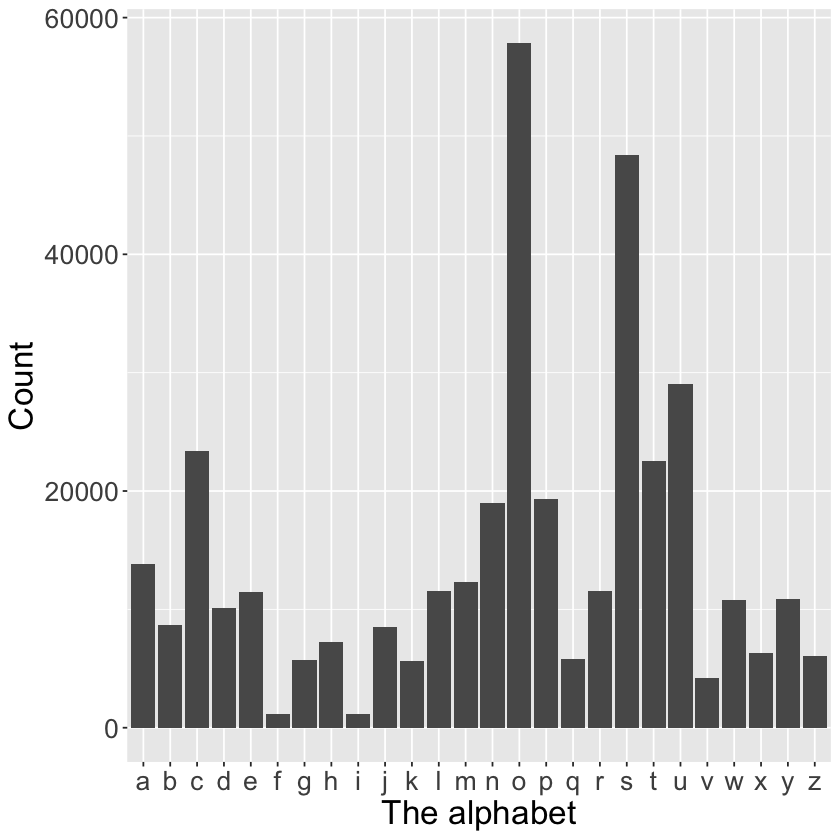

In [5]:
# plot the proportion of amount of each category
proportion_label <- each_letter_count |>
    ggplot(aes(x = label, y = count)) +
    geom_bar(position = "dodge", stat = "identity") +
    labs(x = "The alphabet",
         y = "Count") +
    theme(text = element_text(size = 20))

proportion_label

In [6]:
# find the category which its minimum number 
min_letter <- each_letter_count |>
    arrange(count) |>
    slice(1)

min_letter

label,count
<chr>,<int>
i,1120


In [7]:
# According to the minimum number of letters, 
# for equivlent amount for each categories, 
# extract the equivlent dataset.
extract_data <- downloaded_csv |>
    group_by(label) |>
    do(head(., n = 1000)) |>
    mutate(label = as.factor(label))

levels(extract_data$label) <- alphabet

head(extract_data)

label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [8]:
# count the number of observations for each letter again
letter_recount <- extract_data |>
    group_by(label) |>
    summarize(count = n()) |>
    pivot_wider(names_from = label, values_from = count)

letter_recount

a,b,c,d,e,f,g,h,i,j,⋯,q,r,s,t,u,v,w,x,y,z
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,⋯,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [9]:
# splite raw data into training dataset and testing dataset
extract_data <- mutate(extract_data, label = as.integer(label))
data_split <- initial_split(extract_data, prop = 0.75, strata = label)
chr_training <- training(data_split)
chr_testing <- testing(data_split)

chr_training <- mutate(chr_training, label = as.factor(label)) |>
    ungroup(label)
levels(chr_training$label) <- alphabet

chr_testing <- mutate(chr_testing, label = as.factor(label)) |>
    ungroup(label)
levels(chr_testing$label) <- alphabet

In [10]:
# save the splited data into data folder
write_csv(chr_training, "data/chr_training.csv")
write_csv(chr_testing, "data/chr_testing.csv")

In [11]:
# check the proportion of each category distribution in training dataset
train_proportion <- chr_training |>
    group_by(label) |>
    summarize(count = n()) |>
    pivot_wider(names_from = label, values_from = count)

train_proportion

a,b,c,d,e,f,g,h,i,j,⋯,q,r,s,t,u,v,w,x,y,z
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
751,752,747,757,743,760,740,730,731,756,⋯,737,735,745,754,750,729,745,751,783,742


In [12]:
# check the proportion of each category distribution in testing dataset
test_proportion <- chr_testing |>
    group_by(label) |>
    summarize(count = n()) |>
    pivot_wider(names_from = label, values_from = count)

test_proportion

a,b,c,d,e,f,g,h,i,j,⋯,q,r,s,t,u,v,w,x,y,z
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
249,248,253,243,257,240,260,270,269,244,⋯,263,265,255,246,250,271,255,249,217,258


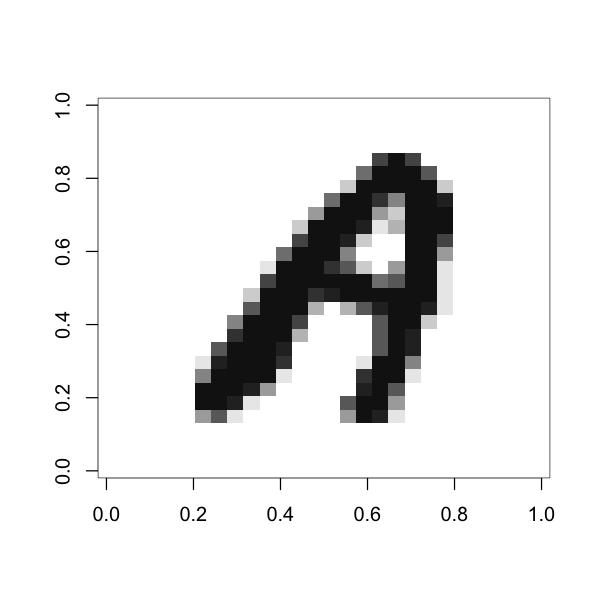

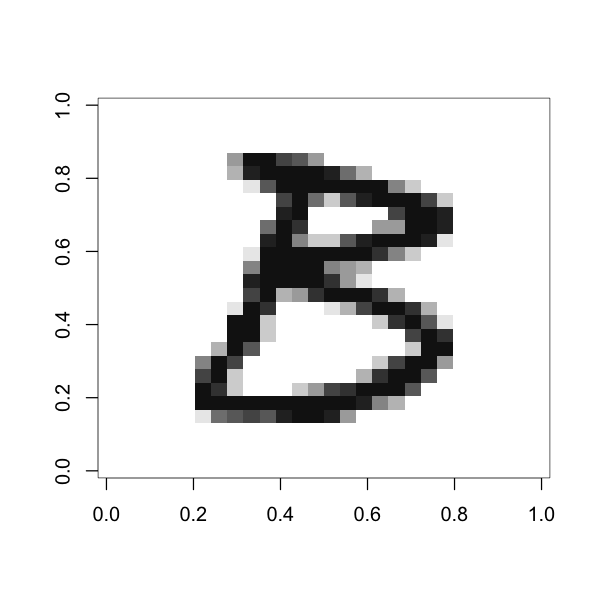

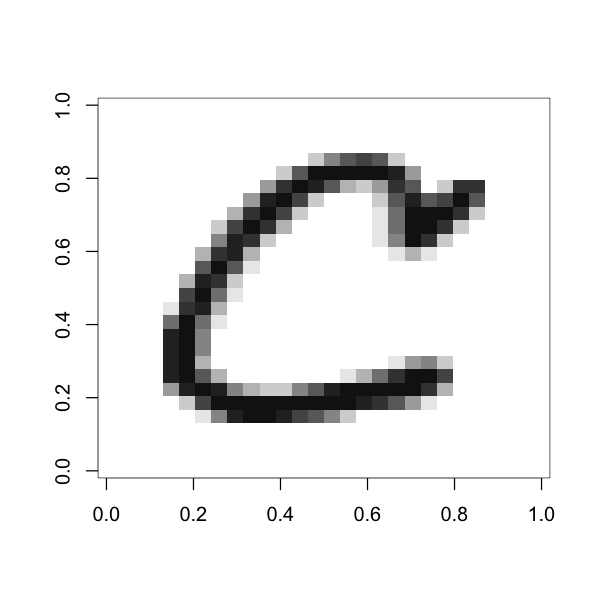

In [13]:
# display the first one in each categories (first 3 letters)
options(repr.plot.height = 5, repr.plot.width = 5)

alphabet_layout <- chr_training |>
    group_by(label) |>
    do(head(., n = 1)) |>
    ungroup(label)

for (i in 1:3){
    show_digit(slice(select(alphabet_layout, -label), i))
    }

### Methods:
Since our data frame is flattened images with 28 x 28 pixels, all 784 (28 x 28 =784)columns will be used as predictors. 

- Step1: Split the data into a training set and a testing set.
- Step2: Use training set to calculate cross-validation accuracy for different numbers of neighbors and select the best k as the neighbors argument in the classification model.
- Step3: Use the found best k to build the model and predict the testing set. Figure out the accuracy of the model, written as “A1”.
- Step4: Using logistic regression model to calculate the likelihood for a single handwritten English character.
- Step5: Plotting a histogram using possibility as x-axis. Selecting an appropriate possibility as the “Cutoff” possibility. By “cutoff”, it means any observation with a possibility that is less than the cutoff will be extracted from the data frame and categorized to “manual recognition needed”.
- Step6: Extract the data in the testing set with lower than cutoff possibilities. Assign this data frame as “testing_without_ambiguous”.
- Step7: Predict and figure out the accuracy with “testing_without_ambiguous” data set using the model we created earlier. Assign the accuracy as A2. 
- Step8: Try different “cutoffs” for “testing_without_ambiguous” data set. Calculate the accuracy for different testing sets and create a data frame with two columns (one is cutoff value, another is the corresponding accuracies). Then visualize the data with a line plot (x-axis is the cutoff value while y-axis is  the corresponding accuracies).
- Step9: Filter both the training set and testing set with different cutoffs, then calculate the corresponding accuracies. Assign the data as a two-column data frame (one column is the cutoff and another is the corresponding accuracies.).
- Step10: Plotting the data frame as a line in different colors on the same plot described above.


### Data analysis:
Observe the plot and identify the points with relatively high accuracy and not too low cutoff. (High accuracy is advantageous for improving recognition accuracy, while not too low cutoff is advantageous for reducing manual costs.) The model and cutoff corresponding to this point serve as our most accurate method for recognizing English letters.

However, naked eyes observation and identifying relatively reasonable points is not accurate enough. It is necessary to calculate the ratio of manual costs to machine costs and determine the comprehensive cost for each cutoff and model. By using a weight function that combines cost and accuracy, we can obtain a comprehensive consideration index for recognizing handwritten English letters. Then, we can find the model and cutoff with the highest index as the best method for recognizing handwritten English letters. However, estimating the costs of manual and machine resources and modeling the weight function are challenging tasks for our team at this stage. Therefore, further research is needed to determine the optimal approach.

### Expected outcomes and significance:

The development of reliable computer handwriting recognition for the 26 letters of the alphabet can greatly reduce the need for manual transcription or data entry. This can lead to significant time savings and reduce labor costs in various industries that heavily rely on handwritten documents, such as administrative work, education, or healthcare. 

By addressing the challenge of unclear handwritten letters as the 27th case, this project can propose techniques and algorithms that enhance the accuracy of handwriting recognition systems. This can be particularly beneficial when dealing with handwritten text that is illegible or poorly written. By incorporating strategies to handle these cases, the overall performance and reliability of the recognition system can be improved. In specialized environments, such as electronic scanning of business documents or postcode recognition in emails, often require robust and reliable handwriting recognition. By exploring the training and testing of fuzzy data, the paper can provide insights into improving the application reliability in these specific domains. This can have significant implications for businesses, postal services, or any industry where accurate and efficient data extraction from handwritten sources is essential.

The research and development efforts undertaken for computer handwriting recognition can contribute to advancements in machine learning and artificial intelligence. Techniques like deep learning, convolutional neural networks, or recurrent neural networks, which are commonly used in handwriting recognition, can benefit from the findings and methodologies proposed in the project. This can lead to further innovation and progress in the broader field of pattern recognition and computer vision.